(-0.5, 1079.5, 607.5, -0.5)

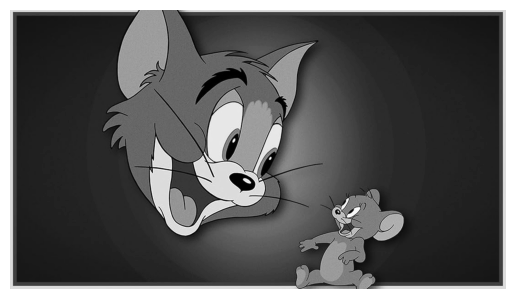

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
plt.imshow(d,cmap='grey')
plt.axis('off')

GAUSSIAN

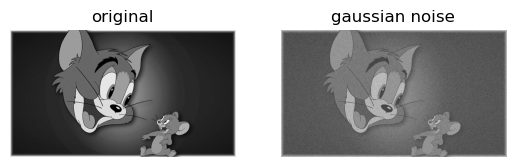

In [79]:

gn=np.random.normal(0, 30, d.shape).astype(np.float32)#mean and std
gaus=cv2.add(d.astype(np.float32),gn)

plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(d,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('gaussian noise')
plt.imshow(gaus,cmap='grey')

(-0.5, 1079.5, 607.5, -0.5)

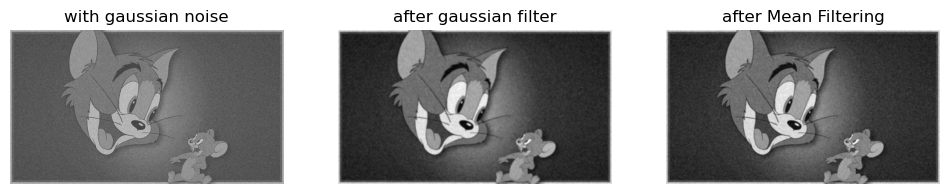

In [86]:


g = cv2.GaussianBlur(gaus, (19, 19), 2)
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.axis('off')
plt.title('with gaussian noise')
plt.imshow(gaus,cmap='grey')

plt.subplot(132)
plt.axis('off')
plt.title('after gaussian filter')
plt.imshow(g,cmap='grey')

k = 5
ker = np.ones((k, k), np.float32) / (k * k)  
me= cv2.filter2D(gaus, -1, ker) 

plt.subplot(133)
plt.imshow(me, cmap='gray')
plt.title('after Mean Filtering')
plt.axis('off')

IMPULSE NOISE

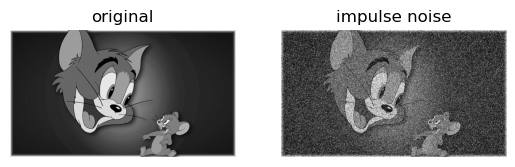

In [40]:
def addsp(im): 
    r,c = im.shape  
    n = np.random.randint(2000, 300000) #no. of pixels
    for i in range(n): 
        xc=np.random.randint(0, r - 1) 
        yc=np.random.randint(0, c - 1) 
        im[xc][yc] = 255        # change to white

    for i in range(n): 
        xc=np.random.randint(0, r - 1) 
        yc=np.random.randint(0, c - 1) 
        im[xc][yc] = 0   #change to black
          
    return im 
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
impulse=addsp(d)
plt.subplot(121)
plt.axis('off')
plt.title('original')
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
plt.imshow(d,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('impulse noise')
plt.imshow(impulse,cmap='grey')


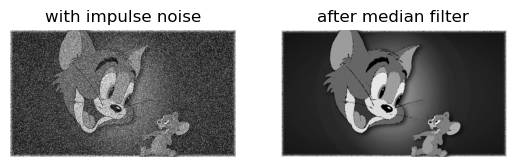

In [41]:
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
sp = cv2.medianBlur(impulse, 5)
plt.subplot(121)
plt.axis('off')
plt.title('with impulse noise')
plt.imshow(impulse,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('after median filter')
plt.imshow(sp,cmap='grey')

UNIFORM

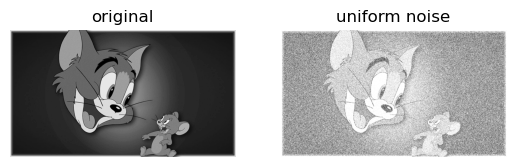

In [9]:
def uninoise(im):
    gamma=1
    un = np.zeros(im.shape[:2])
    cv2.randu(un, 0, 256)
    uni = (un * gamma).astype(np.uint8)
    u = cv2.add(im, uni)
    return u
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)

uni=uninoise(d)
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(d,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('uniform noise')
plt.imshow(uni,cmap='grey')

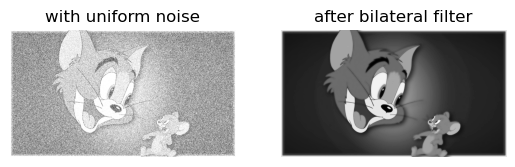

In [40]:
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
# diamater of neighbor pixel ( defines the size of the area around each pixel)
#sigma color(controls the sensitivity to color differences)
#sigmaspace(sensitivity to the spatial distance between pixels)
bi = cv2.bilateralFilter(d, 15, 80, 75) 
  
plt.subplot(121)
plt.axis('off')
plt.title('with uniform noise')
plt.imshow(uni,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('after bilateral filter')
plt.imshow(bi,cmap='grey')

GAMMA NOISE

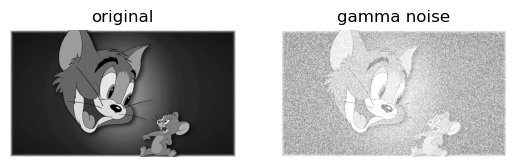

In [30]:

d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
im = d / 255
g = np.random.gamma(1, 1, im.shape) # shape(k)   , scale(theata)  theata incre(or k dec) , noise incr
ga = cv2.add(im, g)
gam = np.clip(ga, 0, 1)
gam = (gam * 255).astype(np.uint8)

plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(d,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('gamma noise')
plt.imshow(gam,cmap='grey')


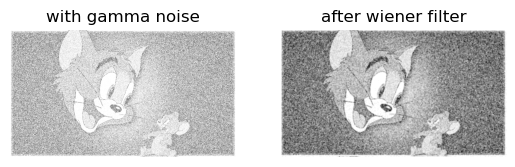

In [34]:

from numpy.fft import fft2, ifft2

def wiener(im, ker, k):
    f = fft2(im)
    kf = fft2(ker, s=im.shape)
    wie= np.conj(kf) / (np.abs(kf) ** 2 + k)

    wi = f * wie
    re = np.abs(ifft2(wi))
    c=np.clip(re, 0, 255)
    return np.uint8(c)

k = cv2.getGaussianKernel(7, sigma=2)  # 1D 
k = k * k.T  #2D
w=wiener(gam,k,5)

d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.axis('off')
plt.title('with gamma noise')
plt.imshow(gam,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('after wiener filter')
plt.imshow(w,cmap='grey')



EXPONENTIAL

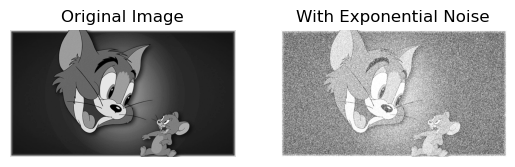

In [39]:

d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
im = d / 255

lamda = 2.0 #high-less noise
exp = np.random.exponential(1 / lamda, im.shape)
ex=cv2.add(im,exp)
ex= np.clip(ex, 0, 1)  

ex = (ex * 255).astype(np.uint8)

plt.subplot(121)
plt.axis('off')
plt.title('Original Image')
plt.imshow(d, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.title('With Exponential Noise')
plt.imshow(ex, cmap='gray')
plt.show()


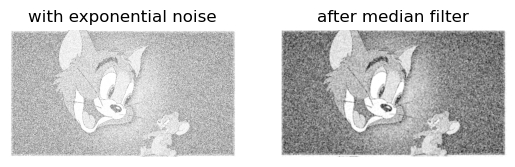

In [55]:
sp = cv2.medianBlur(ex, 7)

plt.subplot(121)
plt.axis('off')
plt.title('with exponential noise')
plt.imshow(gam,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('after median filter')
plt.imshow(w,cmap='grey')

RAYLEIGH

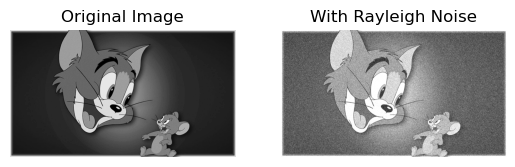

In [69]:
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
r = np.random.rayleigh(50, d.shape)  # scale
ray = np.clip(d + r, 0, 255)
plt.subplot(121)
plt.axis('off')
plt.title('Original Image')
plt.imshow(d, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.title('With Rayleigh Noise')
plt.imshow(ray, cmap='gray')

plt.show()


In [1]:
# Ensure the image is of type CV_8U (8-bit unsigned integer)
if ray.dtype != np.uint8:
    dray = np.uint8(ray)
de = cv2.fastNlMeansDenoising(dray, None, 30, 7, 21)# filter strength  templateWindowSize    searchWindowSize
plt.subplot(121)
plt.axis('off')
plt.title('with rayleigh noise')
plt.imshow(ray,cmap='grey')

plt.subplot(122)
plt.axis('off')
plt.title('after non local means filter')
plt.imshow(de,cmap='grey')

NameError: name 'ray' is not defined

EDGE DETECTION

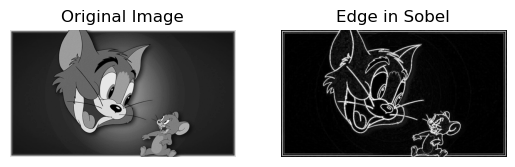

In [41]:
d=cv2.imread(r"C:\Users\hanal\Downloads\t.jpg")
d=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
kx = np.array([[-1,  0,  1],[-2,  0,  2],[-1,  0,  1]])

ky = np.array([[-1, -2, -1],[ 0,  0,  0], [ 1,  2,  1]])
r, c = d.shape

gx = np.zeros_like(d, dtype=np.float32)
gy = np.zeros_like(d, dtype=np.float32)

for i in range(1, r-1): 
    for j in range(1, c-1):
        magx = 0
        for a in range(3):
            for b in range(3):
                xn = i + a - 1
                yn = j + b - 1
                magx += d[xn, yn] * kx[a, b]
        gx[i, j] = magx

for i in range(1, r-1): 
    for j in range(1, c-1):
        magy = 0.0
        for a in range(3):
            for b in range(3):
                xn = i + a - 1
                yn = j + b - 1
                magy += d[xn, yn] * ky[a, b]
        gy[i, j] = magy

m = np.sqrt(gx**2 + gy**2)

# Normalize and convert the magnitude image to uint8 for display
ma = np.uint8(np.clip(m, 0, 255))

plt.subplot(121)
plt.title('Original Image')
plt.axis('off')
plt.imshow(d, cmap='grey')

plt.subplot(122)
plt.title('Edge in Sobel')
plt.axis('off')
plt.imshow(ma, cmap='grey')
plt.show()
